In [2]:
import pandas as pd

heart_df = pd.read_csv("heart.csv")
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df.shape

(303, 14)

## cp : Chest Pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

### restecg:  resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#

#### We should split those into multiple columns using get_dummies

In [4]:
heart_df = pd.get_dummies(heart_df,columns=['cp'])
heart_df = pd.get_dummies(heart_df,columns=['restecg'])

In [5]:
heart_df.shape

(303, 19)

## Check if data is clean

In [6]:
heart_df.isnull()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
heart_df[heart_df.isnull().any(axis=1)].count()

age          0
sex          0
trtbps       0
chol         0
fbs          0
thalachh     0
exng         0
oldpeak      0
slp          0
caa          0
thall        0
output       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
restecg_0    0
restecg_1    0
restecg_2    0
dtype: int64

## additional information about the dataset

In [8]:
heart_df.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## thalach : maximum heart rate achieved
#### And so we tried to see the relationship between it and the risk of having a heart attack (1 : high , 0 : low)

Text(0, 0.5, 'output')

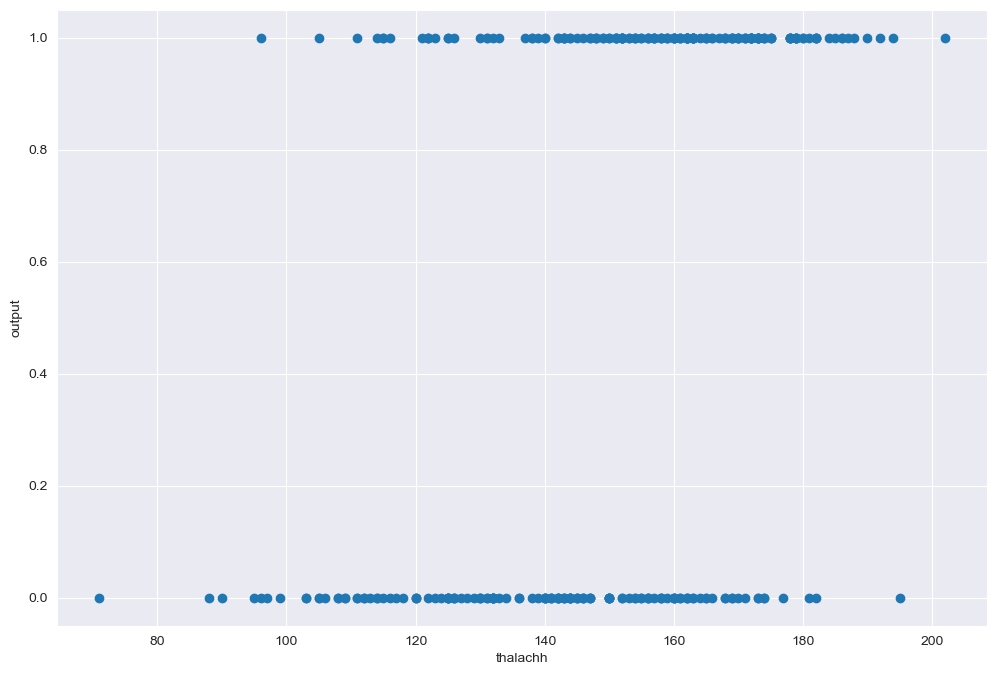

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(heart_df['thalachh'], heart_df['output'])

plt.xlabel('thalachh')
plt.ylabel('output')

In [ ]:
heart_correlation = heart_df.corr()

heart_correlation

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.138253,-0.147399,-0.059432,0.047516,0.141398,-0.160654,0.084621
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.089621,-0.041249,-0.116588,0.088043,0.036539,-0.011940,-0.107689
trtbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.021447,-0.081851,-0.045107,0.151343,0.133249,-0.146576,0.058635
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.070684,-0.012750,-0.037918,-0.050589,0.166565,-0.174394,0.034615
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.060190,-0.060649,0.083679,0.055511,0.077405,-0.066344,-0.048305
thalachh,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.376561,0.248317,0.165475,0.079082,-0.073953,0.101512,-0.120870
exng,0.096801,0.141664,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.469061,-0.233863,-0.271028,-0.093384,0.084059,-0.093776,0.042729
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.280243,-0.277513,-0.132444,0.086959,0.100141,-0.138486,0.168172
slp,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.216056,0.202807,0.109769,-0.064509,-0.125618,0.153431,-0.122080
caa,0.276326,0.118261,0.101389,0.070511,0.137979,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724,0.218226,-0.134715,-0.088998,-0.070496,0.082679,-0.089642,0.030660


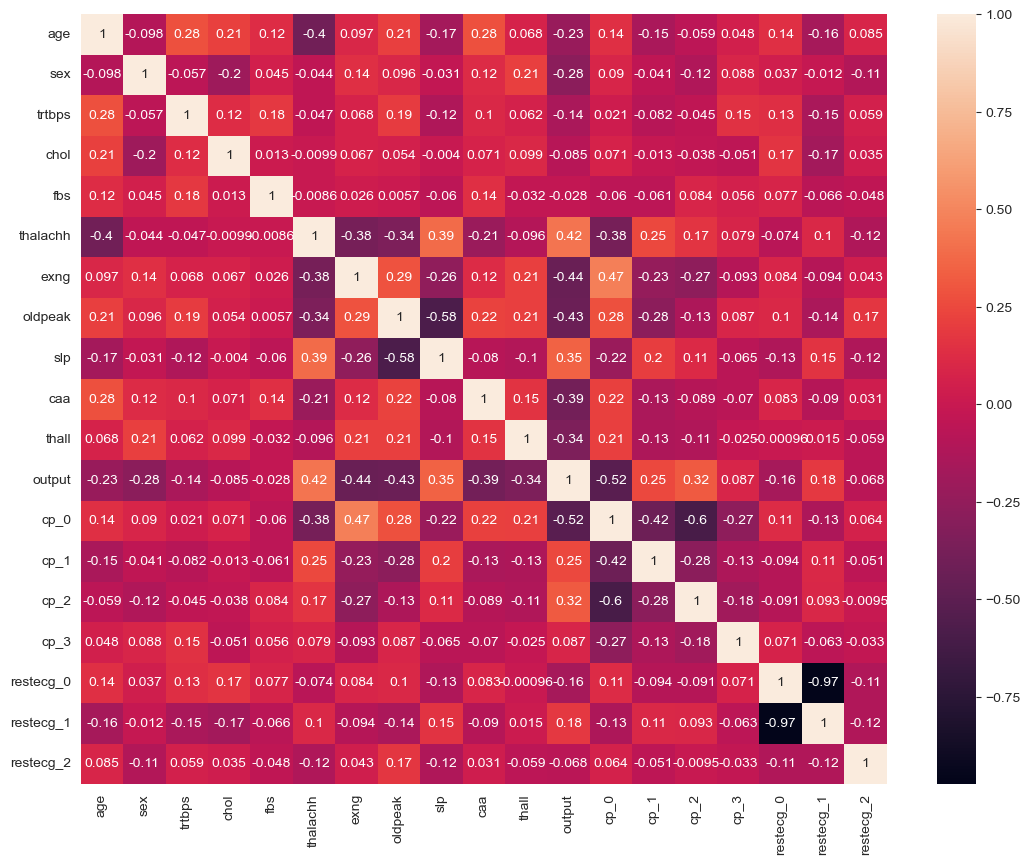

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(heart_correlation,annot=True)
plt.show()

#### cp0 (typical angina) is the type of chest pain that is the most related to heart attacks out of the 4 types.

# Trying to predict high or low chances of heartattacks using multiple machine learning approaches

In [4]:
from sklearn.model_selection import train_test_split
X = heart_df.drop('output', axis=1)
Y = heart_df['output']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Logistical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(penalty='l2', C=1, solver='liblinear')

logistic_model = alg.fit(x_train, y_train)

#### Confusion Matrix

In [ ]:
y_pred = logistic_model.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [ ]:
heart_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

heart_crosstab

y_test,0,1
y_pred,,
0,25,1
1,5,30


#### Precision Recall Scores

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9016393442622951
precision_score :  0.8571428571428571
recall_score :  0.967741935483871


##### This is an acceptable result for the linear regression model

## Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
X = heart_df.drop('output', axis=1)
Y = heart_df['output']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
DT_Model = dt_classifier.fit(x_train, y_train)

#### Confusion Matrix

In [31]:
y_pred = DT_Model.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [32]:
heart_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

heart_crosstab

y_test,0,1
y_pred,,
0,24,5
1,9,23


#### Precision Recall Scores

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7704918032786885
precision_score :  0.71875
recall_score :  0.8214285714285714


## Deep Learning

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import tensorflow as tf

# build a model
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                608       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=15,
    epochs=50,
    verbose=1,
)

Epoch 1/50
17/17 [==============================] - 1s 16ms/step - loss: 8.9590 - binary_accuracy: 0.4959 - val_loss: 1.7457 - val_binary_accuracy: 0.4426
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 1.4315 - binary_accuracy: 0.6033 - val_loss: 0.6304 - val_binary_accuracy: 0.7869
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.9411 - binary_accuracy: 0.6322 - val_loss: 0.4586 - val_binary_accuracy: 0.7705
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7656 - binary_accuracy: 0.6694 - val_loss: 0.4748 - val_binary_accuracy: 0.7705
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.7682 - binary_accuracy: 0.6529 - val_loss: 0.3860 - val_binary_accuracy: 0.8361
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.7116 - binary_accuracy: 0.6405 - val_loss: 0.3627 - val_binary_accuracy: 0.8033
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6

In [11]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3035 - binary_accuracy: 0.8689


[0.30351191759109497, 0.868852436542511]

#### we achieved 86% accuracy using the deep learning method which is decent for this dataset